In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
transaction = pd.read_csv("transaction_data.csv")
behaviour = pd.read_csv("purchase_behaviour.csv")

In [ ]:
transaction.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
behaviour.head(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
data = pd.merge(transaction, behaviour, on="LYLTY_CARD_NBR")

In [6]:
data.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [3]:
# Convert date column to datetime
transaction['DATE'] = pd.to_datetime(transaction['DATE'])

# Aggregate total transactions per customer
customer_transaction_counts = transaction.groupby('LYLTY_CARD_NBR')['TXN_ID'].nunique().reset_index()
customer_transaction_counts.columns = ['LYLTY_CARD_NBR', 'TOTAL_TRANSACTIONS']

# Aggregate total spending per customer
customer_spending = transaction.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum().reset_index()
customer_spending.columns = ['LYLTY_CARD_NBR', 'TOTAL_SPENDING']

# Merge with behavior dataset
customer_summary = behaviour.merge(customer_transaction_counts, on='LYLTY_CARD_NBR', how='left')
customer_summary = customer_summary.merge(customer_spending, on='LYLTY_CARD_NBR', how='left')

# View summary
print(customer_summary.head())


   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER  \
0            1000   YOUNG SINGLES/COUPLES          Premium   
1            1002   YOUNG SINGLES/COUPLES       Mainstream   
2            1003          YOUNG FAMILIES           Budget   
3            1004   OLDER SINGLES/COUPLES       Mainstream   
4            1005  MIDAGE SINGLES/COUPLES       Mainstream   

   TOTAL_TRANSACTIONS  TOTAL_SPENDING  
0                   1             6.0  
1                   1             2.7  
2                   2             6.6  
3                   1             1.9  
4                   1             2.8  


In [10]:
customer_data = transaction.merge(behaviour, on='LYLTY_CARD_NBR', how='left')
# Find top-selling products per life stage
top_products = customer_data.groupby(['LIFESTAGE', 'PROD_NAME'])['TOT_SALES'].sum().reset_index()
top_products = top_products.sort_values(['LIFESTAGE', 'TOT_SALES'], ascending=[True, False])

# Display top 3 products per life stage
top_products.groupby('LIFESTAGE').head(3)



,LIFESTAGE,PROD_NAME,TOT_SALES
86,MIDAGE SINGLES/COUPLES,Smiths Crnkle Chip Orgnl Big Bag 380g,3746.50
6,MIDAGE SINGLES/COUPLES,Cheezels Cheese 330g,3648.00
11,MIDAGE SINGLES/COUPLES,Dorito Corn Chp Supreme 380g,3646.50
125,NEW FAMILIES,Dorito Corn Chp Supreme 380g,1088.75
146,NEW FAMILIES,Kettle Honey Soy Chicken 175g,1063.80
200,NEW FAMILIES,Smiths Crnkle Chip Orgnl Big Bag 380g,1008.90
239,OLDER FAMILIES,Dorito Corn Chp Supreme 380g,7982.00
305,OLDER FAMILIES,Smiths Crinkle Chips Salt & Vinegar 330g,6549.30
304,OLDER FAMILIES,Smiths Crinkle Original 330g,6247.20
353,OLDER SINGLES/COUPLES,Dorito Corn Chp Supreme 380g,8459.75


In [11]:
top_products = top_products.sort_values(['LIFESTAGE', 'TOT_SALES'], ascending=[True, False])

In [ ]:
top_products.groupby('LIFESTAGE').head(3)


,LIFESTAGE,PROD_NAME,TOT_SALES
86,MIDAGE SINGLES/COUPLES,Smiths Crnkle Chip Orgnl Big Bag 380g,3746.50
6,MIDAGE SINGLES/COUPLES,Cheezels Cheese 330g,3648.00
11,MIDAGE SINGLES/COUPLES,Dorito Corn Chp Supreme 380g,3646.50
125,NEW FAMILIES,Dorito Corn Chp Supreme 380g,1088.75
146,NEW FAMILIES,Kettle Honey Soy Chicken 175g,1063.80
200,NEW FAMILIES,Smiths Crnkle Chip Orgnl Big Bag 380g,1008.90
239,OLDER FAMILIES,Dorito Corn Chp Supreme 380g,7982.00
305,OLDER FAMILIES,Smiths Crinkle Chips Salt & Vinegar 330g,6549.30
304,OLDER FAMILIES,Smiths Crinkle Original 330g,6247.20
353,OLDER SINGLES/COUPLES,Dorito Corn Chp Supreme 380g,8459.75


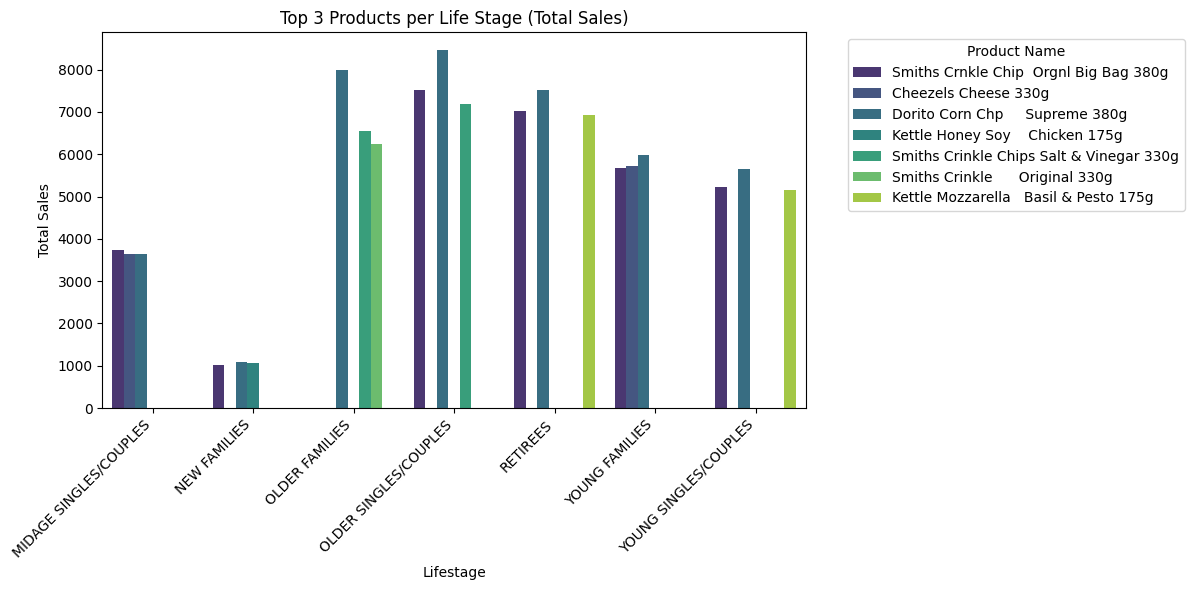

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12, 6))

# Create a bar plot
sns.barplot(
    data=top_products.groupby('LIFESTAGE').head(3),
    x="LIFESTAGE",
    y="TOT_SALES",
    hue="PROD_NAME",
    palette="viridis"
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel("Lifestage")
plt.ylabel("Total Sales")
plt.title("Top 3 Products per Life Stage (Total Sales)")

# Display legend outside the plot
plt.legend(title="Product Name", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


<H3>Finding repeat_purchase</H3>

Track repeat purchases of customers over time

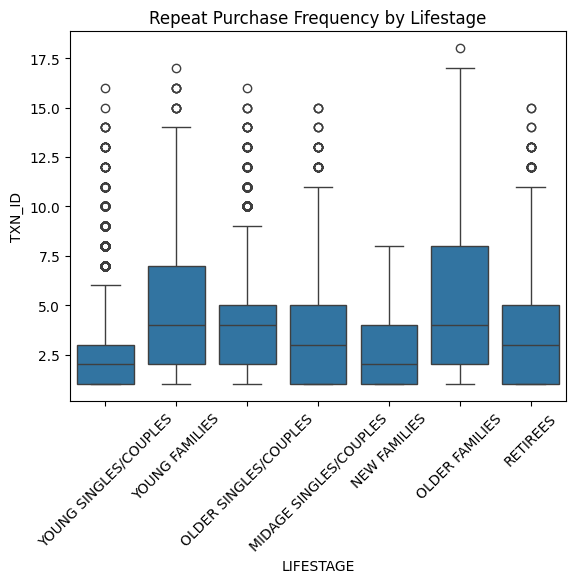

In [14]:
# Count repeat purchases
repeat_purchases = customer_data.groupby(['LYLTY_CARD_NBR', 'LIFESTAGE'])['TXN_ID'].nunique().reset_index()

# Analyze variance in repeat purchases
sns.boxplot(data=repeat_purchases, x='LIFESTAGE', y='TXN_ID')
plt.xticks(rotation=45)
plt.title('Repeat Purchase Frequency by Lifestage')
plt.show()


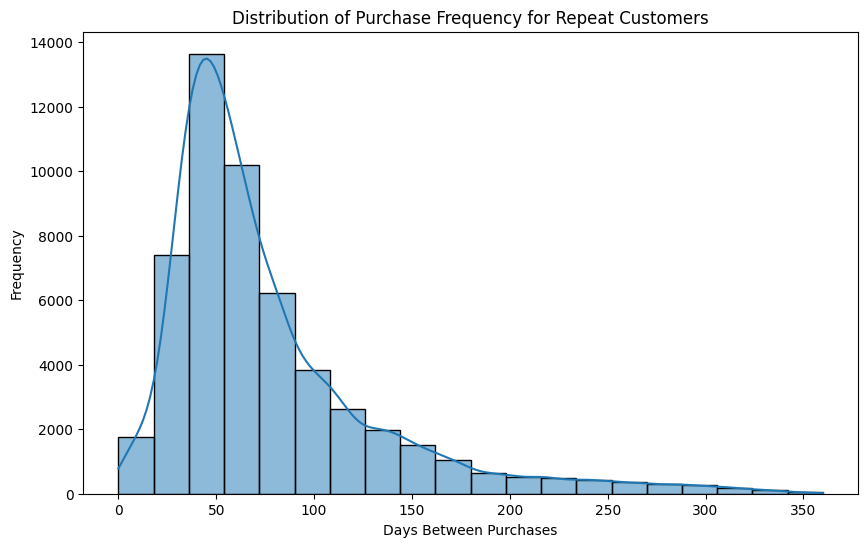

   LYLTY_CARD_NBR         min         max  count  purchase_frequency
2            1003  2019-03-09  2019-03-10      2            1.000000
5            1007  2018-12-06  2018-12-07      2            1.000000
7            1010  2018-09-11  2018-12-16      2           96.000000
8            1011  2018-07-31  2018-12-21      4           47.666667
9            1012  2019-03-17  2019-06-21      2           96.000000


In [ ]:
# Convert DATE to date only (remove time component)
customer_data['DATE'] = pd.to_datetime(customer_data['DATE']).dt.date

# Find the first and last transaction date for each customer
customer_purchase_dates = customer_data.groupby('LYLTY_CARD_NBR')['DATE'].agg(['min', 'max', 'count']).reset_index()

# Calculate the frequency (time between purchases)
# Handling case where there are only 2 purchases
customer_purchase_dates['purchase_frequency'] = customer_purchase_dates.apply(
    lambda row: (row['max'] - row['min']).days / (row['count'] - 1) if row['count'] > 1 else 0,
    axis=1
)

# Filter customers with more than 1 transaction (i.e., repeat buyers)
repeat_customers = customer_purchase_dates[customer_purchase_dates['count'] > 1]

# Plot the purchase frequency
plt.figure(figsize=(10, 6))
sns.histplot(repeat_customers['purchase_frequency'], bins=20, kde=True)
plt.title('Distribution of Purchase Frequency for Repeat Customers')
plt.xlabel('Days Between Purchases')
plt.ylabel('Frequency')
plt.show()

# Show the first few rows to inspect the data
print(repeat_customers.head())

<H3> Total sales by customer segment</H3>

 based on their life stage and whether they are a premium customer or not

In [7]:
# Aggregate total sales by customer segment
customer_segment_sales = data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).agg({"TOT_SALES": "sum"}).reset_index()
customer_segment_sales = customer_segment_sales.sort_values(by="TOT_SALES", ascending=False)

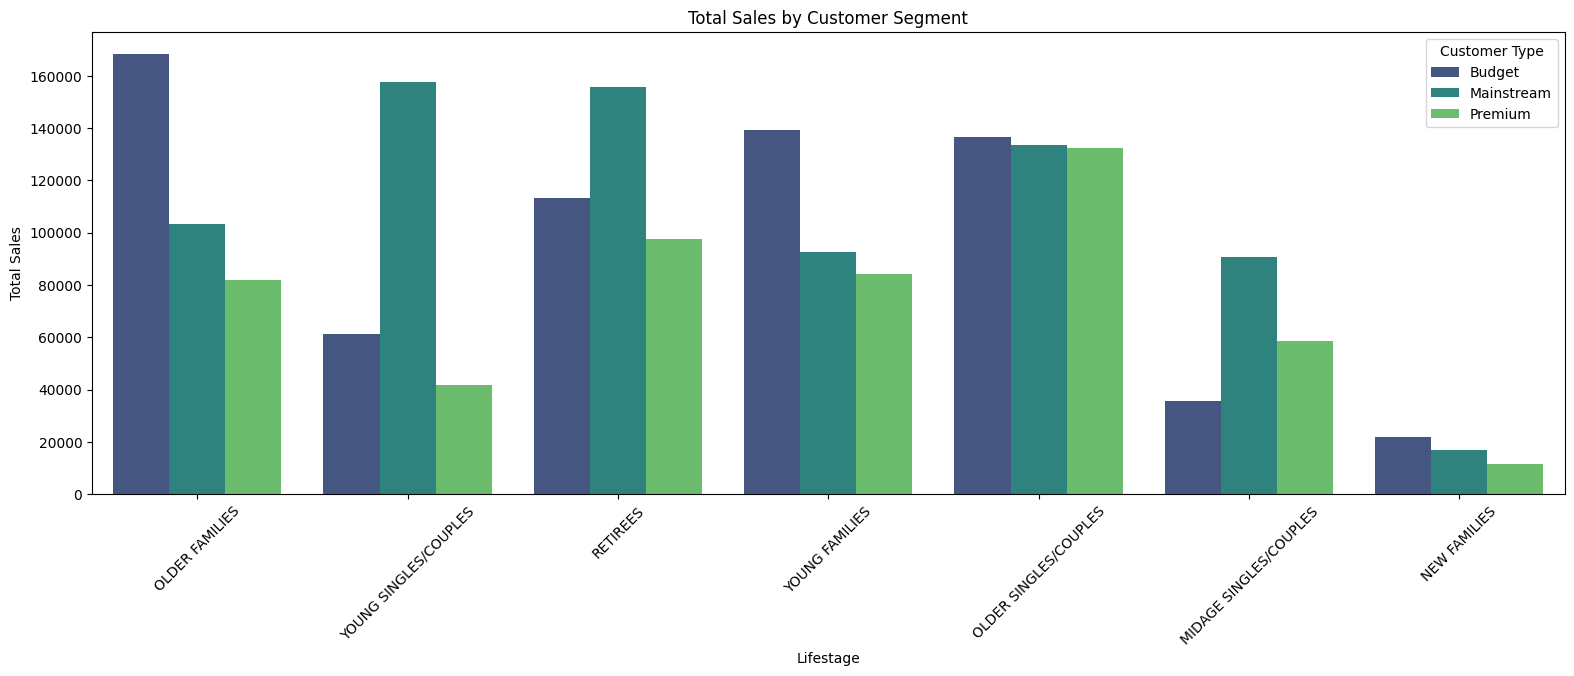

In [8]:
plt.figure(figsize=(19, 6))
sns.barplot(
    data=customer_segment_sales, 
    x="LIFESTAGE", 
    y="TOT_SALES", 
    hue="PREMIUM_CUSTOMER", 
    palette="viridis"
)
plt.title("Total Sales by Customer Segment")
plt.xticks(rotation=45)
plt.ylabel("Total Sales")
plt.xlabel("Lifestage")
plt.legend(title="Customer Type")
plt.show()

In [9]:
# Identify most profitable customer segment
most_profitable_segment = customer_segment_sales.iloc[0]
print("Most Profitable Segment:")
print(most_profitable_segment)

Most Profitable Segment:
LIFESTAGE           OLDER FAMILIES
PREMIUM_CUSTOMER            Budget
TOT_SALES                168363.25
Name: 6, dtype: object


<H3>Transaction Frequency by Life Stage and Day of the Week</H3>

In [55]:
# Check the minimum and maximum values in the DATE column
print(transaction['DATE'].min(), transaction['DATE'].max())


1530576000000000000 1562025600000000000


In [56]:
# Scale down the serial date values (assuming they are in nanoseconds, divide by 1e9 to convert to seconds)
transaction['DATE'] = transaction['DATE'] / 1e9  # Convert nanoseconds to seconds

# Now convert to datetime with 'unit' set to 's' (seconds)
transaction['DATE'] = pd.to_datetime(transaction['DATE'], origin='1970-01-01', unit='s')

# Check the result
print(transaction[['DATE']].head())


        DATE
0 2018-10-19
1 2019-05-16
2 2019-05-22
3 2018-08-19
4 2018-08-20


                 LIFESTAGE DAY_OF_WEEK  TXN_COUNT
0   MIDAGE SINGLES/COUPLES      Friday       3640
1   MIDAGE SINGLES/COUPLES      Monday       3537
2   MIDAGE SINGLES/COUPLES    Saturday       3576
3   MIDAGE SINGLES/COUPLES      Sunday       3623
4   MIDAGE SINGLES/COUPLES    Thursday       3490
5   MIDAGE SINGLES/COUPLES     Tuesday       3621
6   MIDAGE SINGLES/COUPLES   Wednesday       3623
7             NEW FAMILIES      Friday        995
8             NEW FAMILIES      Monday       1011
9             NEW FAMILIES    Saturday        997
10            NEW FAMILIES      Sunday        974
11            NEW FAMILIES    Thursday        944
12            NEW FAMILIES     Tuesday       1014
13            NEW FAMILIES   Wednesday        984
14          OLDER FAMILIES      Friday       6958
15          OLDER FAMILIES      Monday       6925
16          OLDER FAMILIES    Saturday       6839
17          OLDER FAMILIES      Sunday       7000
18          OLDER FAMILIES    Thursday       6829


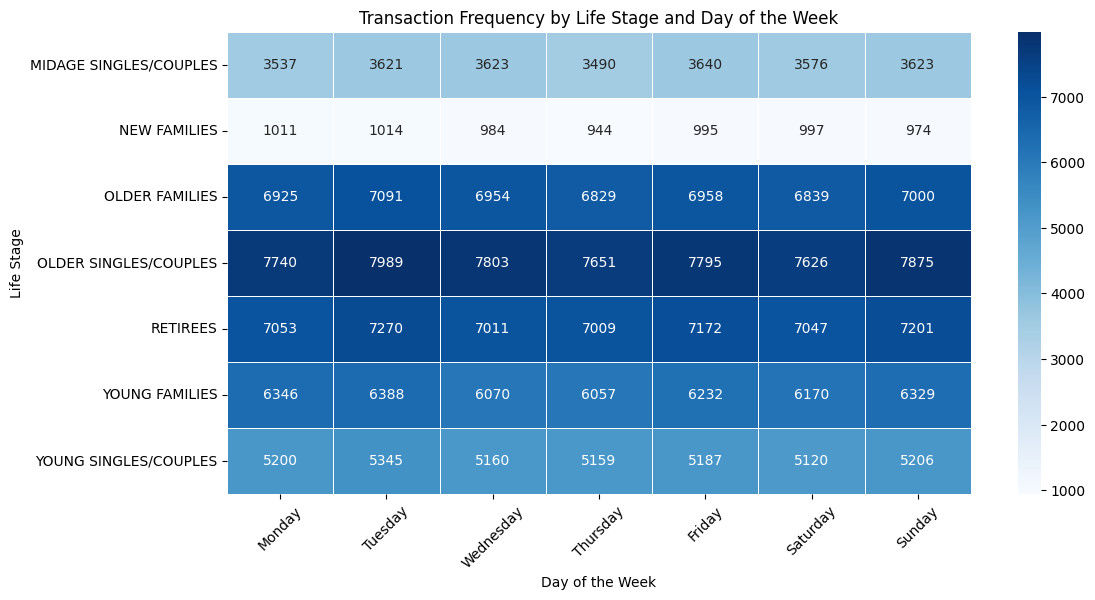

In [57]:
# Merge transaction data with behavior data
customer_data = pd.merge(transaction, behaviour, on='LYLTY_CARD_NBR', how='left')

# Extract the day of the week from the 'DATE' column (0=Monday, 6=Sunday)
customer_data['DAY_OF_WEEK'] = customer_data['DATE'].dt.dayofweek

# Map the days of the week to their names for easier interpretation
customer_data['DAY_OF_WEEK'] = customer_data['DAY_OF_WEEK'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})

# Grouping data by LifeStage and DayOfWeek to check the transaction counts
daily_lifestage_activity = customer_data.groupby(['LIFESTAGE', 'DAY_OF_WEEK']).size().reset_index(name='TXN_COUNT')

# Print the grouped data to check how the transactions are distributed across days and life stages
print(daily_lifestage_activity)

# Proceed to pivot and reindex as before
pivot_data = daily_lifestage_activity.pivot(index="LIFESTAGE", columns="DAY_OF_WEEK", values="TXN_COUNT")

# Ensure all days are represented, fill missing days with 0
all_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_data = pivot_data.reindex(columns=all_days, fill_value=0)

# Print the pivoted data for inspection
print(pivot_data)

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, annot=True, cmap="Blues", fmt="d", linewidths=0.5)
plt.title("Transaction Frequency by Life Stage and Day of the Week")
plt.ylabel("Life Stage")
plt.xlabel("Day of the Week")
plt.xticks(rotation=45)
plt.show()


Day with the most transactions: Tuesday with 38718 transactions


C:\Users\divya\AppData\Local\Temp\ipykernel_20532\1024657176.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_weekday_weekend, x='WEEKEND', y='TOT_SALES', palette='viridis')


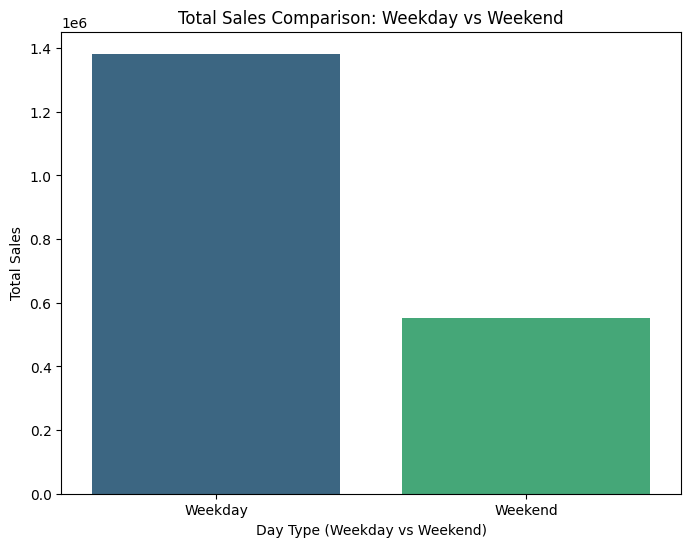

In [59]:
transaction['DAY_OF_WEEK'] = transaction['DATE'].dt.dayofweek

# Map the days of the week to their names for easier interpretation
transaction['DAY_OF_WEEK'] = transaction['DAY_OF_WEEK'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})

daywise_txns = transaction.groupby('DAY_OF_WEEK').size().reset_index(name='TXN_COUNT')

# Find the day with the most transactions
most_transactions_day = daywise_txns.loc[daywise_txns['TXN_COUNT'].idxmax()]
print(f"Day with the most transactions: {most_transactions_day['DAY_OF_WEEK']} with {most_transactions_day['TXN_COUNT']} transactions")

# Define weekday and weekend categories
weekend_days = ['Saturday', 'Sunday']
transaction['WEEKEND'] = transaction['DAY_OF_WEEK'].apply(lambda x: 'Weekend' if x in weekend_days else 'Weekday')

# Grouping by Weekend vs Weekday to compare sales
sales_by_weekday_weekend = transaction.groupby('WEEKEND')['TOT_SALES'].sum().reset_index()

# Plotting the comparison of weekday vs weekend sales
plt.figure(figsize=(8, 6))
sns.barplot(data=sales_by_weekday_weekend, x='WEEKEND', y='TOT_SALES', palette='viridis')
plt.title("Total Sales Comparison: Weekday vs Weekend")
plt.ylabel("Total Sales")
plt.xlabel("Day Type (Weekday vs Weekend)")
plt.show()

In [61]:
# Ensure that the merge was successful
customer_data = pd.merge(transaction, behaviour, on='LYLTY_CARD_NBR', how='left')

# Check columns to ensure LIFESTAGE is present
print(customer_data.columns)

# Group by both DAY_OF_WEEK and LIFESTAGE (or PREMIUM_CUSTOMER if preferred)
groupwise_txns = customer_data.groupby(['DAY_OF_WEEK', 'LIFESTAGE']).size().reset_index(name='TXN_COUNT')

# Find the day with the most transactions for each LIFESTAGE group
most_transactions_day_groupwise = groupwise_txns.loc[groupwise_txns.groupby('LIFESTAGE')['TXN_COUNT'].idxmax()]

# Print the result to see the day with the most transactions by group
for index, row in most_transactions_day_groupwise.iterrows():
    print(f"Lifestage: {row['LIFESTAGE']} - Day with most transactions: {row['DAY_OF_WEEK']} with {row['TXN_COUNT']} transactions")


Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'DAY_OF_WEEK', 'WEEKEND',
       'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')
Lifestage: MIDAGE SINGLES/COUPLES - Day with most transactions: Friday with 3640 transactions
Lifestage: NEW FAMILIES - Day with most transactions: Tuesday with 1014 transactions
Lifestage: OLDER FAMILIES - Day with most transactions: Tuesday with 7091 transactions
Lifestage: OLDER SINGLES/COUPLES - Day with most transactions: Tuesday with 7989 transactions
Lifestage: RETIREES - Day with most transactions: Tuesday with 7270 transactions
Lifestage: YOUNG FAMILIES - Day with most transactions: Tuesday with 6388 transactions
Lifestage: YOUNG SINGLES/COUPLES - Day with most transactions: Tuesday with 5345 transactions


In [10]:
# Analyze avg. transaction value per segment
avg_txn_value = data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).agg({"TOT_SALES": "mean"}).reset_index()

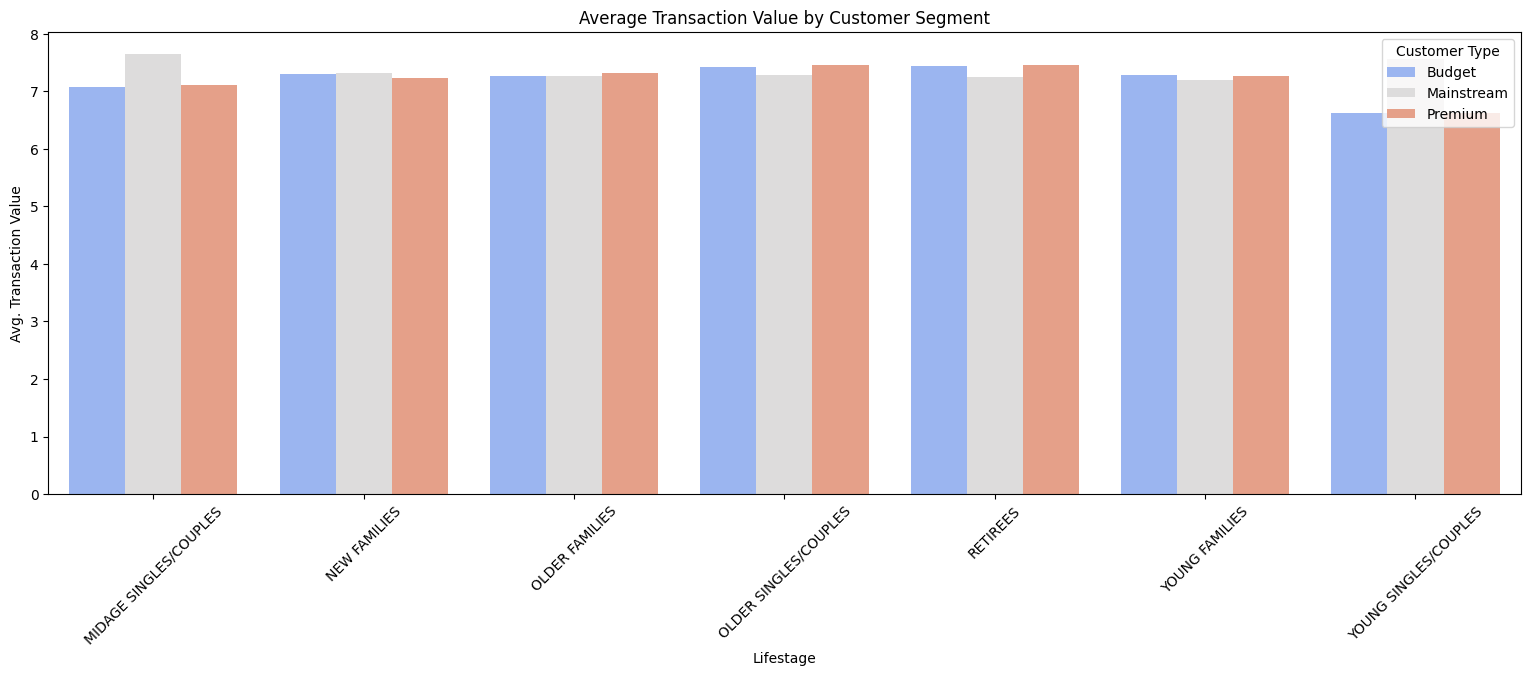

In [11]:
plt.figure(figsize=(19, 6))
sns.barplot(
    data=avg_txn_value, 
    x="LIFESTAGE", 
    y="TOT_SALES", 
    hue="PREMIUM_CUSTOMER", 
    palette="coolwarm"
)
plt.title("Average Transaction Value by Customer Segment")
plt.xticks(rotation=45)
plt.ylabel("Avg. Transaction Value")
plt.xlabel("Lifestage")
plt.legend(title="Customer Type")
plt.show()

In [12]:
# Analyzing purchase frequency
purchase_frequency = data.groupby(["LYLTY_CARD_NBR", "LIFESTAGE", "PREMIUM_CUSTOMER"]).agg({"TXN_ID": "count"}).reset_index()
purchase_frequency.columns = ["LYLTY_CARD_NBR", "LIFESTAGE", "PREMIUM_CUSTOMER", "PURCHASE_FREQUENCY"]

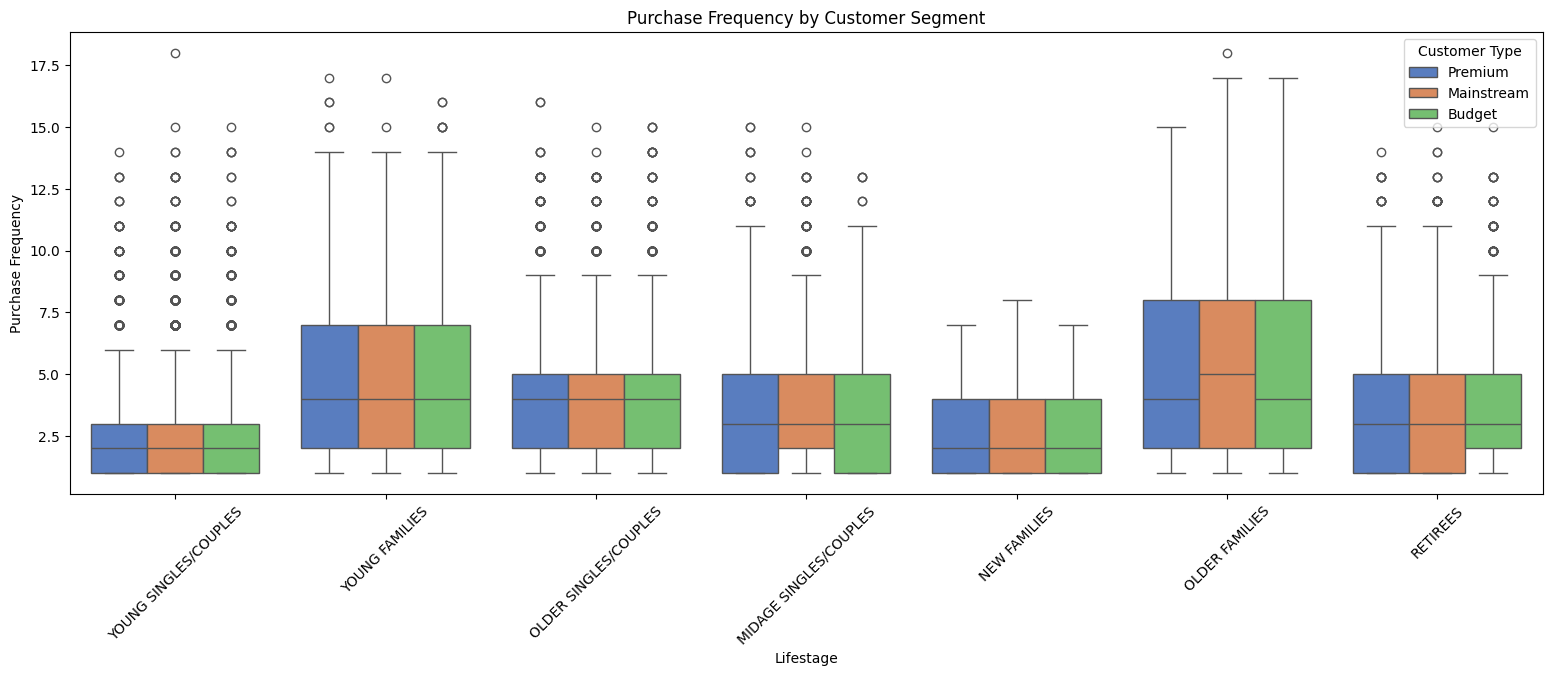

In [13]:
plt.figure(figsize=(19, 6))
sns.boxplot(
    data=purchase_frequency, 
    x="LIFESTAGE", 
    y="PURCHASE_FREQUENCY", 
    hue="PREMIUM_CUSTOMER", 
    palette="muted"
)
plt.title("Purchase Frequency by Customer Segment")
plt.xticks(rotation=45)
plt.ylabel("Purchase Frequency")
plt.xlabel("Lifestage")
plt.legend(title="Customer Type")
plt.show()

<H3>Feature Importance</H3>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:

# Ensure 'DATE' column is in datetime format
customer_data["DATE"] = pd.to_datetime(customer_data["DATE"], errors='coerce')

# Feature Engineering
customer_data["LIFESTAGE_ENC"] = customer_data["LIFESTAGE"].astype("category").cat.codes
customer_data["PREMIUM_CUSTOMER_ENC"] = customer_data["PREMIUM_CUSTOMER"].astype("category").cat.codes


In [ ]:
#Pre-Processing
# Ensure DATE column is valid before computing time difference
customer_data['TIME_SINCE_FIRST_PURCHASE'] = (
    customer_data['DATE'] - customer_data.groupby('LYLTY_CARD_NBR')['DATE'].transform('min')
).dt.days

# Avoid division by zero by replacing NaNs and infinities
customer_data['TIME_SINCE_FIRST_PURCHASE'].fillna(1, inplace=True)
customer_data['PURCHASE_FREQUENCY'] = customer_data.groupby('LYLTY_CARD_NBR')['DATE'].transform('count') / customer_data['TIME_SINCE_FIRST_PURCHASE']
customer_data['PURCHASE_FREQUENCY'].replace([np.inf, -np.inf], np.nan, inplace=True)
customer_data['PURCHASE_FREQUENCY'].fillna(customer_data['PURCHASE_FREQUENCY'].median(), inplace=True)


In [ ]:
# Prepare data for machine learning
features = ["LIFESTAGE_ENC", "PREMIUM_CUSTOMER_ENC", "PROD_QTY", "TIME_SINCE_FIRST_PURCHASE", "PURCHASE_FREQUENCY"]
target = "TOT_SALES"
X = customer_data[features]
y = customer_data[target]

# Handle any remaining NaNs
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C:\Users\divya\AppData\Local\Temp\ipykernel_20532\3971152735.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_data['TIME_SINCE_FIRST_PURCHASE'].fillna(1, inplace=True)
C:\Users\divya\AppData\Local\Temp\ipykernel_20532\3971152735.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

Mean Absolute Error: 1.8517901391283693
R2 Score: 0.0714901705934965


C:\Users\divya\AppData\Local\Temp\ipykernel_20532\3971152735.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x="Importance", y="Feature", palette="coolwarm")


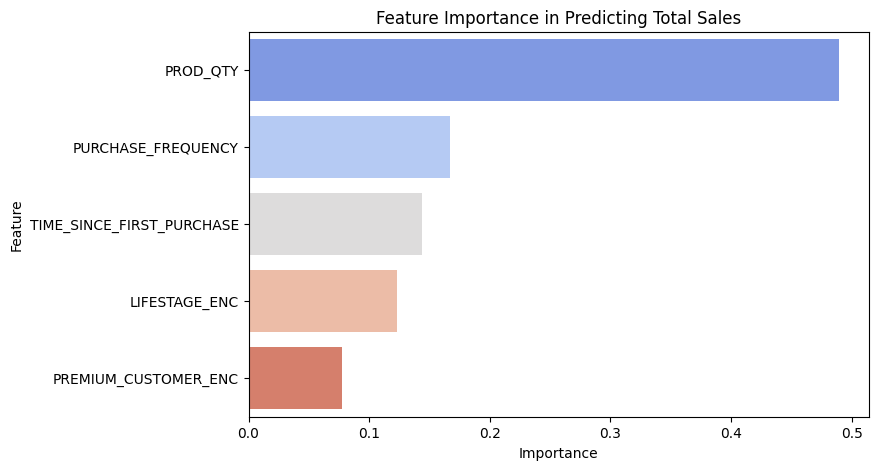

In [ ]:
# Scale features (important for models like Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

# Feature Importance Analysis
feature_importance = pd.DataFrame({
    "Feature": features,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=feature_importance, x="Importance", y="Feature", palette="coolwarm")
plt.title("Feature Importance in Predicting Total Sales")
plt.show()
